In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [ ]:
import kagglehub

path = kagglehub.dataset_download("rakeshrau/social-network-ads")

print("Path to dataset files:", path)

100%|██████████| 3.27k/3.27k [00:00<00:00, 1.16MB/s]

Extracting files...
Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\rakeshrau\social-network-ads\versions\1


In [ ]:


path = r"C:\Users\Lenovo\.cache\kagglehub\datasets\rakeshrau\social-network-ads\versions\1\Social_Network_Ads.csv"
df = pd.read_csv(path)




In [12]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Features and target

In [ ]:

X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']



# Split into train and test

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



# Feature scaling

In [ ]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Load the model

In [16]:
from sklearn.svm import SVC

# Linear Kernel SVM
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
svm_rbf.fit(X_train, y_train)


SVC(C=1, gamma=0.1)

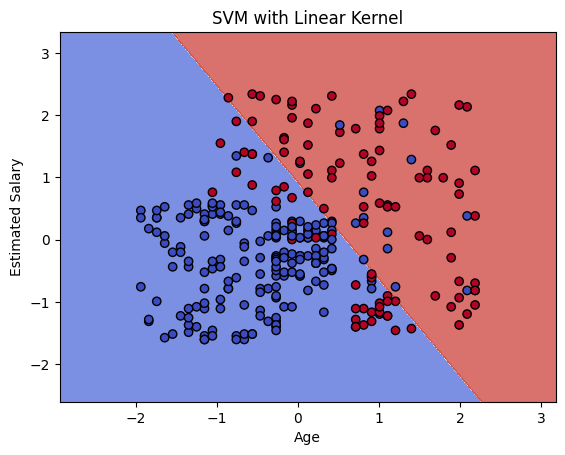

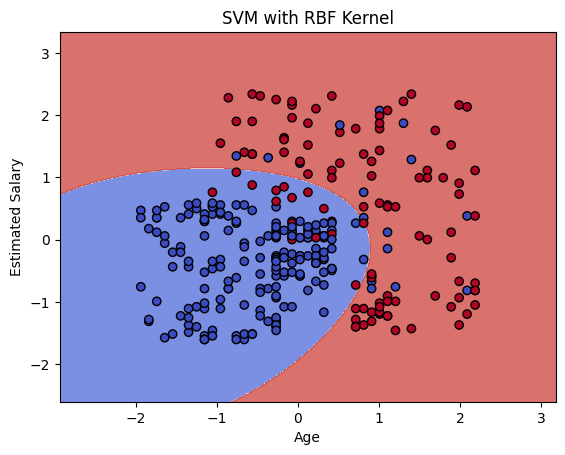

In [ ]:


def plot_decision_boundary(model, X, y, title):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01)
    )
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=plt.cm.coolwarm)
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

plot_decision_boundary(svm_linear, X_train, y_train, 'SVM with Linear Kernel')
plot_decision_boundary(svm_rbf, X_train, y_train, 'SVM with RBF Kernel')


In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.5, 0.1, 0.01],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [21]:
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_




# Evaluate

In [22]:

scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation Accuracy Scores: [0.91666667 0.95       0.91666667 0.83333333 0.9       ]
Mean Accuracy: 0.9033333333333333
